## Features Explanation:
The following describes the columns present in the data.
* CustomerID -- Unique identifier of the customers
* Gender -- Whether the customer is a male or a female
* SeniorCitizen -- Whether a customer is a senior citizen or not
* Partner -- Whether the customer has a partner or not (Yes, No)
* Dependents -- Whether the customer has dependents or not (Yes, No)
* Tenure -- Number of months the customer has stayed with the company
* Phone Service -- Whether the customer has a phone service or not (Yes, No)
* MultipleLines -- Whether the customer has multiple lines or not
* InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)
* OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)
* OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)
* DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)
* StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)
* Contract -- The contract term of the customer (Month-to-Month, One year, Two year)
* PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)
* Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))
* MonthlyCharges -- The amount charged to the customer monthly
* TotalCharges -- The total amount charged to the customer
* Churn -- Whether the customer churned or not (Yes or No)    

# QUESTIONS:
1) Does age factor affect the customers churn rate?
2) Among customers who have churned, which type of contract is most prevalent?
3) Which gender has the higest rate of churning
4) What is the percentage breakdown of customers who have left the company? (Pie chart)
5) Is there a correlation between total charges and the type of contract? (Bar chart)
6) How does the churn rate vary based on the duration of customer subscription (tenure)?

# DATA UNDERSTANDING

### Libraries Importation

In [802]:
import pandas as pd
from dotenv import dotenv_values
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import pyodbc
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split



### Database Connection

In [803]:
login = dotenv_values('.env')

In [804]:
PASS = login.get('password')
USER = login.get('user')
SERVER = login.get('server')
DATABASE = login.get('dbname')

In [805]:
connection = f"DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={SERVER};DATABASE={DATABASE};UID={USER};PWD={PASS};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


In [806]:
conn = pyodbc.connect(connection)

In [807]:
query = '''SELECT *
        FROM dbo.LP2_Telco_churn_first_3000'''


In [808]:
df = pd.read_sql_query(query,conn)

df.head(3)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\3855960581.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query,conn)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True


In [809]:
# Testing dataset
df2 = pd.read_excel('Telco-churn-second-2000.xlsx')
df2.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55


In [810]:
# Evaluation dataset
df3 = pd.read_csv('LP2_Telco-churn-last-2000.csv')
df3.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No


In [811]:
df3.shape

(2043, 21)

In [812]:
df.shape

(3000, 21)

### Concate the Data(df & df3)

In [813]:
data= pd.concat([df,df3],ignore_index=True,verify_integrity=True,axis=0)
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True


## EDA

In [814]:
data.shape

(5043, 21)

In [815]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [816]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.0,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


### * To check duplicates

In [817]:
data.duplicated().sum()

0

### * To check missing data

In [818]:
data.isna().sum().sum()

4181

In [819]:
data['TotalCharges']= pd.to_numeric(data['TotalCharges'], errors='coerce',color='skyblue')
data.hist();

TypeError: to_numeric() got an unexpected keyword argument 'color'

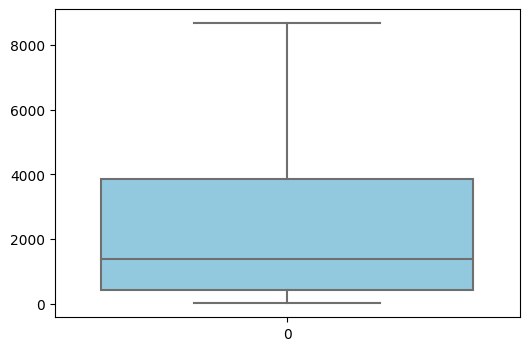

In [ ]:
data_box = df[['SeniorCitizen','tenure','TotalCharges','MonthlyCharges']]
plt.figure(figsize=(6,4))
sns.boxplot(data=data['TotalCharges'],color='skyblue');

In [ ]:
data.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.004597,0.221780,0.095212
tenure,0.004597,1.000000,0.240645,0.826264
MonthlyCharges,0.221780,0.240645,1.000000,0.647007
TotalCharges,0.095212,0.826264,0.647007,1.000000


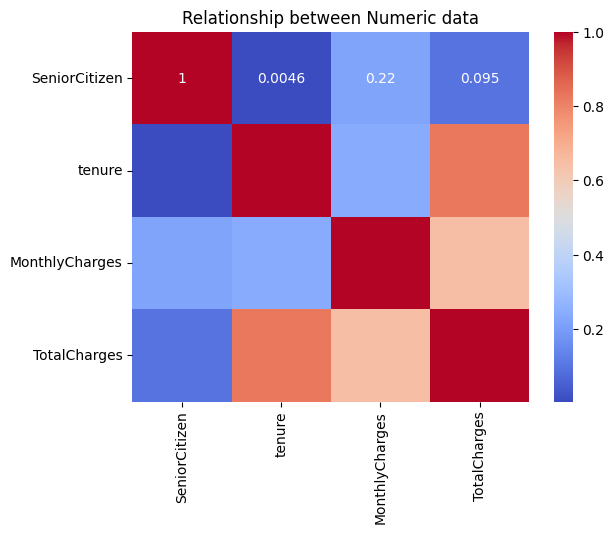

In [ ]:
data = data.select_dtypes(include='number').corr()


heatmap =sns.heatmap(data=data,annot= True,cmap='coolwarm',annot_kws={'size': 10})
heatmap.set_title('Relationship between Numeric data')
plt.show()

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


In [ ]:
data.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5043,5043,5043,5043,5043,4774,5043,4392,4392,4392,4392,4392,4392,5043,5043,5043,5042
unique,5043,2,4,4,4,5,3,5,5,5,5,5,5,3,4,4,4
top,7590-VHVEG,Male,False,False,True,False,Fiber optic,False,False,False,False,False,True,Month-to-month,True,Electronic check,False
freq,1,2559,1538,2070,2731,1437,2248,1478,1320,1296,1476,1190,1199,2744,1776,1700,2219


## ANSWER THE QUESTIONS:

### 1) Does age factor affect the customers churn rate?

In [ ]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.50,False


In [ ]:
data['Churn'].unique()


array([False, True, None, 'No', 'Yes'], dtype=object)

In [ ]:
data['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [ ]:
data['Churn'].replace({False:'No',True:'Yes'}, inplace= True)

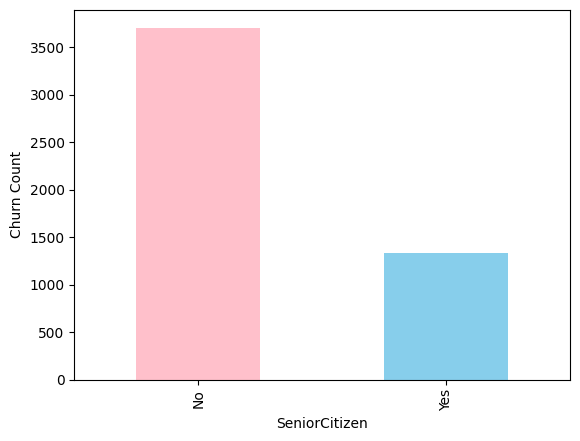

In [ ]:

(
    data.groupby('Churn')['SeniorCitizen']
    .count().plot(kind='bar',ylabel='Churn Count',xlabel='SeniorCitizen',color=('pink','skyblue'))
    
);

### 2) Among customers who have churned, which type of contract is most prevalent?

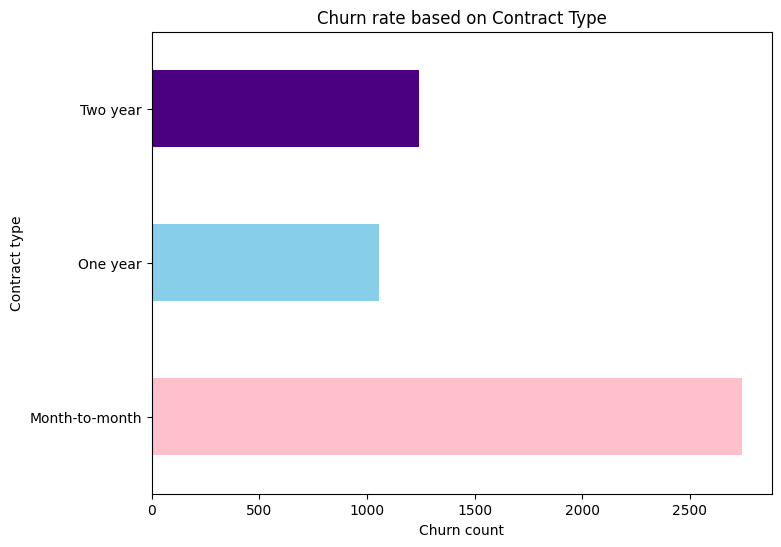

In [ ]:
contract_churn = (
    data.groupby('Contract')['Churn'].count()
)

plt.figure(figsize=(8,6))
contract_churn.plot(kind='barh', color=['pink','skyblue','indigo'])
plt.title('Churn rate based on Contract Type')
plt.ylabel('Contract type')
plt.xlabel('Churn count');

### 3) Which gender has the higest rate of churning

In [ ]:
data['Churn'].unique()

array(['No', 'Yes', None], dtype=object)

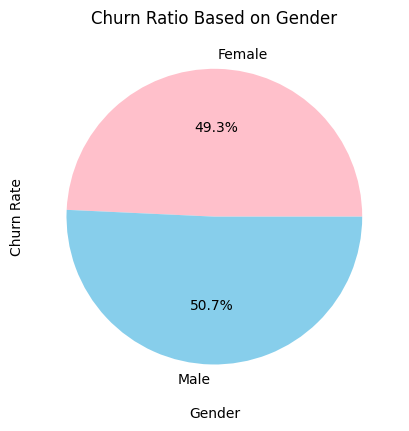

In [ ]:
#data['Churn'] = data['Churn'].replace({False:'No',True:'Yes'})
gender = data.groupby('gender')['Churn'].count()
gender.plot(kind='pie', colors=['pink','skyblue'], autopct='%1.1f%%')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('Churn Ratio Based on Gender')
plt.show();

### 4) What is the percentage breakdown of customers who have left the company? (Pie chart)

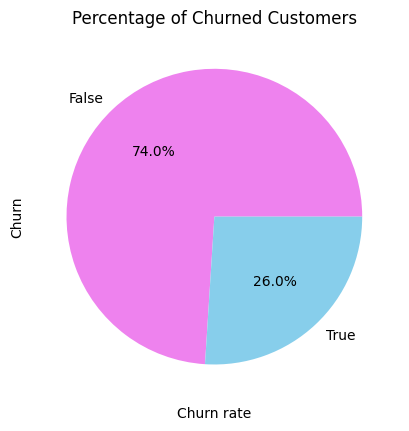

In [ ]:
left = df.groupby('Churn')['Churn'].count()

left.plot(kind='pie', colors=['violet','skyblue'], autopct='%1.1f%%')
plt.xlabel('Churn rate')
#plt.ylabel('Churn Rate')
plt.title('Percentage of Churned Customers')
plt.show();

### 5) Is there a correlation between total charges and the type of contract? (Bar chart)

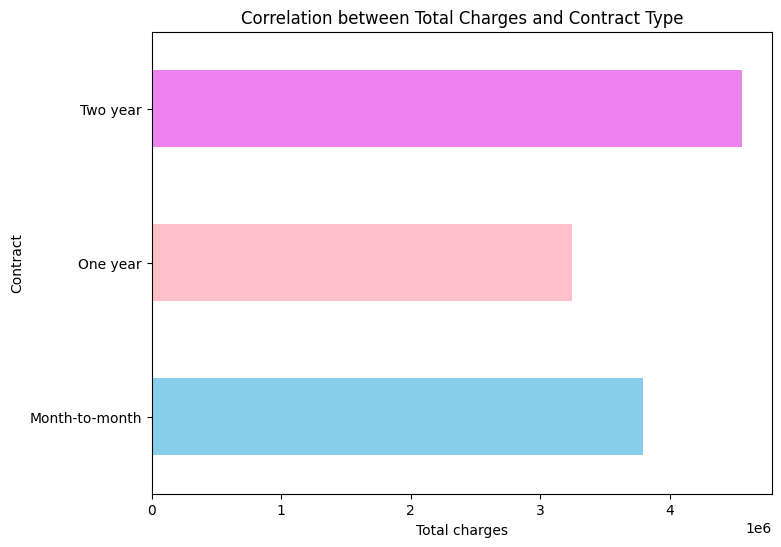

In [ ]:
corr_charges_contract = data.groupby('Contract')['TotalCharges'].sum()

plt.figure(figsize=(8,6))
corr_charges_contract.plot(kind='barh',color=['skyblue','pink','violet'])
plt.xlabel('Total charges')
plt.title('Correlation between Total Charges and Contract Type')
plt.show()

### 6) How does the churn rate vary based on the duration of customer subscription (tenure)?

In [ ]:
data['tenure'].max()

72

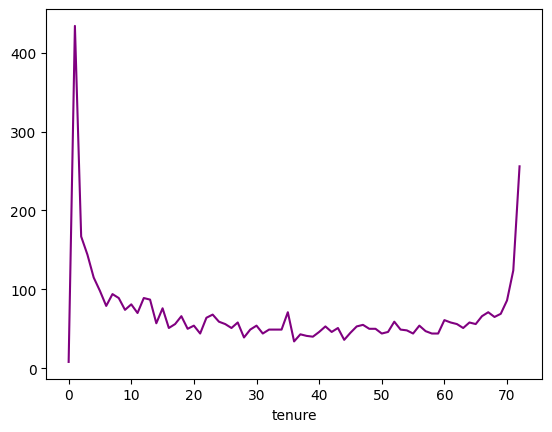

In [ ]:
#bin= [0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59, 60-64, 65-69, 70-74]
Sub = data.groupby('tenure')['Churn'].count()
Sub.plot(kind='line',color='purple')
labels= ()

# DATA PREPARATION

In [ ]:
data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

### Split data into X ,y

In [ ]:
X = data.drop(columns=['Churn','customerID'])
y = data['Churn']

In [ ]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000
1,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000
2,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002
3,Male,0,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000
4,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994


In [ ]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [ ]:
y.isna().sum()

1

In [ ]:
X.isna().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
dtype: int64

### Create Pipeline

In [ ]:

numeric_col = X.select_dtypes(include='number').columns

#numeric_col= pd.to_numeric(numeric_col)
numeric_col

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [ ]:
categorical_col = X.select_dtypes(include='object').columns
categorical_col

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [ ]:
#X.loc[:, 'Partner'].str.replace(True, 'yes')
bool_string = {True : 'Yes', False : 'No',
               'Yes' : 'Yes', 'No' : 'No'}

#X['Partner'].replace(bool_string)

In [ ]:
X.loc[:,categorical_col] = X[categorical_col].apply(lambda x: x.replace(bool_string))
categorical_col = X.select_dtypes(include=['bool','object']).columns
categorical_col

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [ ]:
X.shape

(5043, 19)

In [ ]:
numeric_pipe = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('Scaler',RobustScaler())
])
#numeric_pipe = Pipeline(steps=[
   # ('Imputer', SimpleImputer(strategy='mean')),
   # ('log_transformation', FunctionTransformer(np.log1p)),
    #('scaler', StandardScaler())
#])

categoric_pipe = Pipeline(steps=[
    ('cat_imputer',SimpleImputer(missing_values=pd.NA,strategy='constant',fill_value='None')),
    ('encode',OneHotEncoder(handle_unknown='ignore'))
])

transformer = ColumnTransformer([
    ('num_pipe',numeric_pipe,numeric_col),
    ('cat_pipe',categoric_pipe,categorical_col)
])

In [ ]:
X_transform = pd.DataFrame(transformer.fit_transform(X),columns=transformer.get_feature_names_out())
X_transform

,num_pipe__SeniorCitizen,num_pipe__tenure,num_pipe__MonthlyCharges,num_pipe__TotalCharges,cat_pipe__gender_Female,cat_pipe__gender_Male,cat_pipe__Partner_No,cat_pipe__Partner_Yes,cat_pipe__Dependents_No,cat_pipe__Dependents_Yes,...,cat_pipe__StreamingMovies_Yes,cat_pipe__Contract_Month-to-month,cat_pipe__Contract_One year,cat_pipe__Contract_Two year,cat_pipe__PaperlessBilling_No,cat_pipe__PaperlessBilling_Yes,cat_pipe__PaymentMethod_Bank transfer (automatic),cat_pipe__PaymentMethod_Credit card (automatic),cat_pipe__PaymentMethod_Electronic check,cat_pipe__PaymentMethod_Mailed check
0,0.0,-0.595745,-0.749885,-0.400093,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.106383,-0.250576,0.140570,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,-0.574468,-0.307692,-0.377329,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.340426,-0.520498,0.126396,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,-0.574468,0.002764,-0.364682,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,0.0,-0.106383,0.262552,0.169934,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5039,0.0,0.914894,0.601566,1.731871,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5040,0.0,-0.382979,-0.754491,-0.308047,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5041,1.0,-0.531915,0.070935,-0.319633,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Split data into Train and Test

In [ ]:
X_train,X_eval,y_train,y_eval = train_test_split(X,y, train_size=0.8, random_state=42)

### Label Encode

In [ ]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_eval)

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
X_train.shape

(4034, 19)

In [ ]:
X_eval.shape

(1009, 19)

In [ ]:
y_train.value_counts()

Churn
No     2973
Yes    1061
Name: count, dtype: int64

### ML Pipeline

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,classification_report
from sklearn.naive_bayes import Gus

unbalanced_metrics = pd.DataFrame(columns=['model_name','Accuracy','Precision'])

models = ()

for model_name,classifier in models:


   pipe = Pipeline([
    ('preprocessor', transformer),
    ('classifier', classifier)
])
    
   pipe.fit(X_train,y_train_encoded) 

   y_pred = pipe.predict(X_test)

   metrics = classification_report(y_test_encoded,y_pred, output_dict=True)

   accuracy = metrics['accuracy']
   precision = metrics['weighted avg']['precision']
   recall = metrics['weighted avg']['recall']
   f1_score =metrics ['weighted avg']['f1-score']

   balanced_metrics.loc[len(balanced_metrics)] = [model_name, accuracy,precision,recall,f1_score]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='None',
                                                                                 missing_values=<NA>,
                                                                                 strategy='constant')),
                                                                  ('e...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [ ]:
random_forest_pipe = Pipeline([
    ('preprocessor',transformer),
    ('classifier',RandomForestClassifier(random_state=42))
])
random_forest_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='None',
                                                                                 missing_values=<NA>,
                                                                                 strategy='constant')),
                                                                  ('e...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
Gradient_pipe = Pipeline([
    ('preprocessor',transformer),
    ('classifier',GradientBoostingClassifier(random_state=1))
])

Gradient_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='None',
                                                                                 missing_values=<NA>,
                                                                                 strategy='constant')),
                                                                  ('e...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', GradientBoostingClassifier(random_state=1))])

In [ ]:
Naives = Pipeline([
    ('preprocessor',transformer),
    ('classifier',GaussianNB())
])

Naives.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='None',
                                                                                 missing_values=<NA>,
                                                                                 strategy='constant')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', GaussianNB())])

In [ ]:
data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

In [ ]:
from imblearn.over_sampling

In [ ]:
pred = Gradient_pipe.predict(X_eval)

print(classification_report(y_eval, pred))

TypeError: '<' not supported between instances of 'str' and 'NoneType'